# Trabalho 02 - K-Means


**Refêrencia:** https://iacomcafe.com.br/machine-learning-kmeans-python-scratch/


### Importação de bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Inicialização dos centroides

Esta função é responsável por inicializar os centroides no algoritmo K-Means.

Ela escolhe aleatoriamente k pontos do conjunto de dados para serem os centróides iniciais.

In [2]:
# X = dados (matriz com amostras e caracteristicas)
# k = numero de clusters
def iniciar_centroids(X, k):
  n_amostras = X.shape[0] #X.shape retorna o tamanho da tabela de dados
  random_indices = np.random.choice(n_amostras, k, replace=False) #escolhe k aleatorios e garante q nao haja repeticao
  centroids = X[random_indices] #define os pontos iniciais dos centroides
  return centroids

## Atribuição de clusters

Essa função é responsável pela atribuição de clusters no algoritmo.

Ela calcula a distância de cada ponto até todos os centroides e atribui o ponto ao cluster mais próximo com base na menor distância.

Isso é essencial para agrupar os dados em K clusters.

In [3]:
def atribui_clusters(X, centroids):
  #np.linalg.norm() calcula a distância euclidiana entre cada ponto e cada centróide.
  distancias = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
  cluster_rotulo = np.argmin(distancias, axis=1) #Retorna o índice do centróide mais próximo para cada ponto
  return cluster_rotulo

## Atualização dos centroides

Esta função recalcula os centroides de cada cluster com a média dos pontos atribuídos ao respectivo cluster.

Essa etapa é fundamental para ajustar os centroides, aproximando-os dos “centros” reais dos clusters formados pelos dados.

In [4]:
def atualiza_centroids(X, cluster_rotulo, k):
    novo_centroids = np.array([X[cluster_rotulo == i].mean(axis=0) for i in range(k)])
    return novo_centroids

## Algoritmo principal

O algoritmo começa inicializando os centroides e, em seguida, itera através de duas etapas principais:

*   atribuição de clusters
*   atualização dos centroides.

O processo continua até atingir o número máximo de iterações (max_iters) ou até que os centroides converjam, ou seja, quando a mudança na posição de todos os centroides for menor que uma tolerância definida (tol).

No final, o algoritmo retorna os centroides finais e os rótulos de cluster para os dados.

Essas etapas garantem que o algoritmo otimize a divisão dos dados em k grupos.

In [5]:
#max_iters=100: número máximo de iterações do algoritmo.
#tol=1e-4: tolerância de variação mínima (para decidir se convergiu).
def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = iniciar_centroids(X, k)
    for i in range(max_iters):
        cluster_rotulo = atribui_clusters(X, centroids)
        novo_centroids = atualiza_centroids(X, cluster_rotulo, k)

        # Verifica convergência - se os centróides mudaram muito pouco
        if np.all(np.abs(novo_centroids - centroids) < tol):
            break
        centroids = novo_centroids

    return centroids, cluster_rotulo

# Implementação Dataset

##Dataset Iris

O K-Means pode ser usado para **agrupar as amostras de flores em clusters** com base nas características mencionadas.

In [6]:
from sklearn.datasets import load_iris

In [7]:
# Carrega o dataset Iris
iris = load_iris()
dados_iris = iris.data[:, :2]   # pega apenas 2 colunas para visualizar melhor (Comprimento e Largura da Sépala)

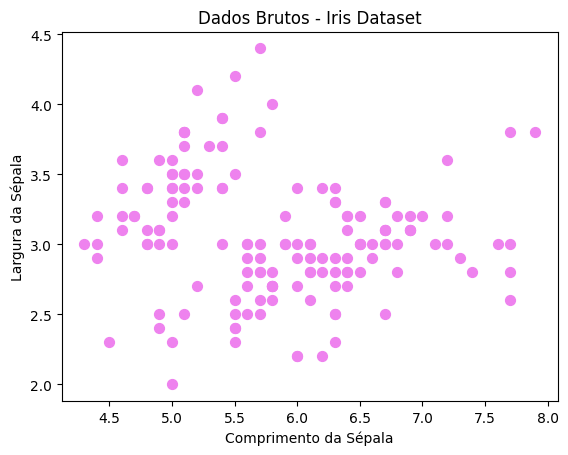

In [8]:
# Visualização inicial
#s=50: tamanho dos pontos.

plt.scatter(dados_iris[:, 0], dados_iris[:, 1], s=50, c='violet')
plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.title('Dados Brutos - Iris Dataset')
plt.show()

o grafico permite observar:

- **Visualização da Dispersão:** ver como os pontos (cada um representando uma flor de Iris) estão espalhados no gráfico. Dá uma ideia da variabilidade e da relação entre o comprimento e a largura da sépala para todas as amostras no dataset.


- **Possível Agrupamento (Visual):** é possivel perceber visualmente se há concentrações de pontos em certas áreas. Essas concentrações podem sugerir a existência de grupos naturais (clusters) dentro dos dados. No caso do dataset Iris com estas duas características, pode-se notar que os pontos não estão completamente aleatórios, e há indícios de que algumas amostras se agrupam mais juntas do que outras.


- **Preparação para o K-Means:** é útil para entender a natureza dos dados antes de aplicar o K-Means. O objetivo do K-Means será justamente identificar e formalizar esses possíveis agrupamentos visualizados no gráfico bruto.

## Execução do K-Means

In [9]:
k = 3  # número de clusters

In [10]:
centroides_iris, rotulos_iris = kmeans(dados_iris, k)

In [11]:
cores = ['lightcoral', 'violet', 'yellowgreen']

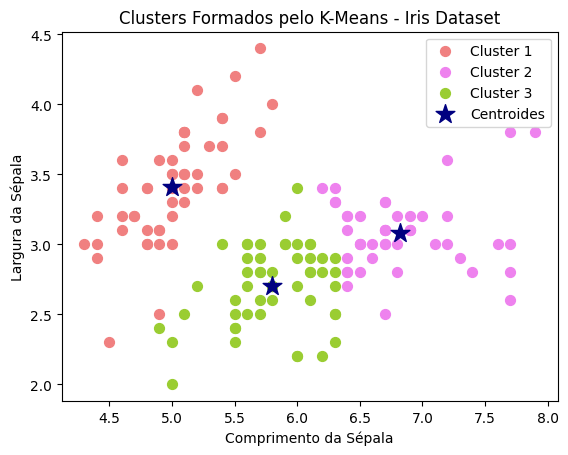

In [12]:
plt.figure()

for i in range(k):
    plt.scatter(dados_iris[rotulos_iris  == i, 0], dados_iris[rotulos_iris  == i, 1],
                s=50, c=cores[i], label=f'Cluster {i+1}')

plt.scatter(centroides_iris [:, 0], centroides_iris [:, 1], s=200, c='navy', marker='*', label='Centroides')

plt.xlabel('Comprimento da Sépala')
plt.ylabel('Largura da Sépala')
plt.title('Clusters Formados pelo K-Means - Iris Dataset')
plt.legend()
plt.show()

- Cada ponto no gráfico representa uma amostra de flor de Iris. A cor de cada ponto indica a qual dos 3 clusters (definidos pelo k=3) o algoritmo K-Means a atribuiu.
- As diferentes cores representam os três clusters encontrados.

  - **Agrupamentos:** os pontos de cores semelhantes tendem a se agrupar, formando concentrações no gráfico. Isso demonstra que o algoritmo K-Means conseguiu identificar grupos distintos nos dados com base nas características de sépala.
  - **Estrelas Azuis (Centroides):** As estrelas azuis representam os centroides finais de cada cluster. Os centroides são, essencialmente, os "centros" de cada grupo.
  
    O algoritmo moveu esses centroides iterativamente até que eles estivessem no ponto médio dos dados atribuídos a cada cluster. A posição de cada estrela azul indica a média do Comprimento e Largura da Sépala para todos os pontos naquele cluster.
  - **Separação:** A distância entre os grupos coloridos e seus respectivos centroides, bem como a separação entre os diferentes grupos coloridos, indica o quão bem o algoritmo conseguiu separar os dados em clusters.

# Métricas de Desempenho - Iris

In [13]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

###Coeficiente de Silhueta (Silhouette Score):


Mede o quão bem os pontos estão agrupados em comparação com outros clusters.

* O valor vai de -1 a 1:
  
    • Um valor próximo de 1 indica que os pontos estão bem agrupados e longe de outros clusters.

    • Um valor próximo de 0 indica que os pontos estão na fronteira entre dois clusters.

    • Um valor negativo indica que os pontos podem estar atribuídos ao cluster errado.

* É uma métrica muito útil para avaliar a coesão e a separação dos clusters.

In [14]:
#mede o nível de coesão e separação dos clusters.
silhouette_iris = silhouette_score(dados_iris, rotulos_iris)
# Quanto maior o Silhouette, melhor.

### Índice de Davies-Bouldin


*   Mede a média da razão entre a dispersão dentro do cluster e a separação entre os clusters.


    **• Objetivo:** Minimizar o valor.
    
    **• Interpretação:** Quanto menor o índice, melhor a qualidade do agrupamento (menos sobreposição entre clusters).


In [15]:
#mede a compactação e separação entre clusters.
davies_iris = davies_bouldin_score(dados_iris, rotulos_iris)
#Quanto menor o Davies-Bouldin, melhor.

###Resultado


In [16]:
print("=== RESULTADOS - IRIS ===")
print(f"Coeficiente de Silhueta: {silhouette_iris:.4f}")
print(f"Índice de Davies-Bouldin: {davies_iris:.4f}\n")

=== RESULTADOS - IRIS ===
Coeficiente de Silhueta: 0.4424
Índice de Davies-Bouldin: 0.7662



**Coeficiente de Silhueta = 0.4451:** indica que os clusters formados pelo K-Means têm uma qualidade razoável.
- Um valor mais próximo de 1 seria ideal, sugerindo que os pontos estão bem agrupados dentro de seus próprios clusters e bem separados de outros clusters.
- Um valor em torno de 0.4 indica que os clusters são distinguíveis, mas pode haver alguma sobreposição ou pontos na fronteira entre os clusters. Não é um agrupamento perfeito, mas também não é ruim.

**Índice de Davies-Bouldin = 0.7676:** Sugere que a dispersão dentro dos clusters é menor em comparação com a separação entre eles, indicando que os clusters estão razoavelmente bem definidos e não se sobrepõem excessivamente.

O Coeficiente de Silhueta de 0.4451 indica uma separação moderada, e o Índice de Davies-Bouldin de 0.7676 sugere que os clusters são razoavelmente compactos e separados.

##Dataset Wine

In [17]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [18]:
wine = load_wine()

In [19]:
dados_wine = wine.data[:, :2]  # Duas primeiras features apenas para visualização
                          # (pois o dataset completo possui 13 variáveis — difícil de plotar todas)

In [20]:
# Guarda os nomes dessas duas features para usar nos eixos do gráfico
nomes_features = wine.feature_names[:2]

O K-Means usa distância euclidiana. Então, se uma variável tem valores
muito maiores que outra (ex: 100 vs 1), ela domina o cálculo da distância.

A padronização (StandardScaler) coloca todas as variáveis na mesma escala:
média = 0 e desvio padrão = 1.

In [21]:
# Padroniza os dados (muito importante para K-Means)
scaler = StandardScaler()
dados_wine_padronizado  = scaler.fit_transform(dados_wine)

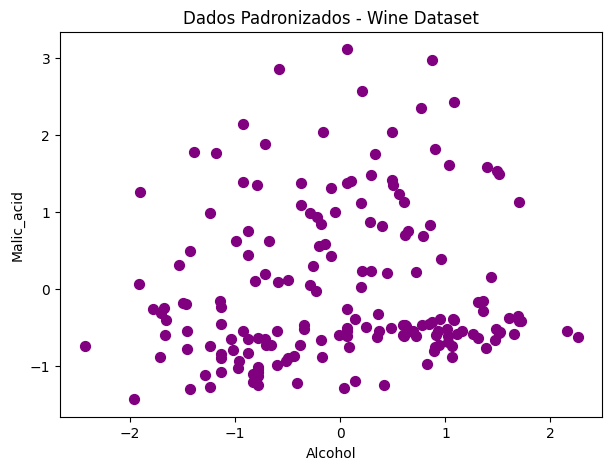

In [22]:
# Visualização inicial dos dados brutos
plt.figure(figsize=(7, 5))
plt.scatter(dados_wine_padronizado[:, 0], dados_wine_padronizado[:, 1], s=50, c='purple')
plt.xlabel(nomes_features[0].capitalize())
plt.ylabel(nomes_features[1].capitalize())
plt.title('Dados Padronizados - Wine Dataset')
plt.show()

## Execução do K-Means

In [23]:
k = 3  # número de clusters

In [24]:
centroides_wine, rotulos_wine = kmeans(dados_wine_padronizado, k)

In [25]:
# Visualização dos clusters formados
cores = ['plum', 'salmon', 'skyblue']

Como o Wine tem 13 features, mostra apenas as duas primeiras no gráfico


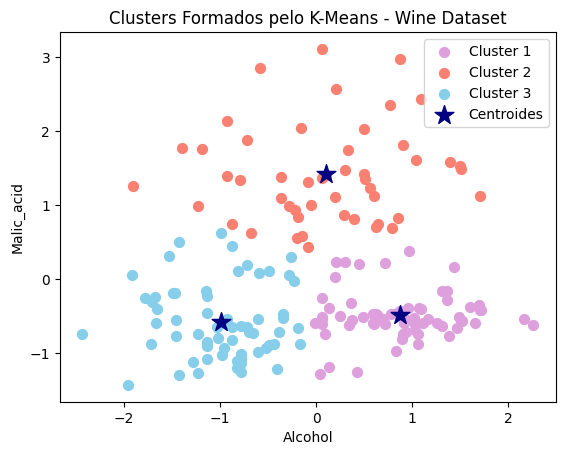

In [26]:
plt.figure()

for i in range(k):
    plt.scatter(dados_wine_padronizado[rotulos_wine == i, 0], dados_wine_padronizado[rotulos_wine == i, 1],
                s=50, c=cores[i], label=f'Cluster {i+1}')

plt.scatter(centroides_wine[:, 0], centroides_wine[:, 1], s=200, c='navy', marker='*', label='Centroides')

plt.xlabel(nomes_features[0].capitalize())
plt.ylabel(nomes_features[1].capitalize())
plt.title('Clusters Formados pelo K-Means - Wine Dataset')
plt.legend()
plt.show()

# Métricas de Desempenho - Wine

###Coeficiente de Silhueta (Silhouette Score):


Mede o quão bem os pontos estão agrupados e separados entre clusters.
Valores próximos de 1 indicam boa separação, 0 indicam sobreposição e negativos indicam classificação incorreta.

In [27]:
silhouette_wine = silhouette_score(dados_wine_padronizado, rotulos_wine)

### Índice de Davies-Bouldin


Mede a razão entre a dispersão interna dos clusters e a distância entre eles.
Quanto menor o valor, melhor a qualidade do agrupamento.

In [28]:
davies_wine = davies_bouldin_score(dados_wine_padronizado, rotulos_wine)

###Resultado


In [29]:
print("=== RESULTADOS - WINE ===")
print(f"Coeficiente de Silhueta: {silhouette_wine:.4f}")
print(f"Índice de Davies-Bouldin: {davies_wine:.4f}\n")

=== RESULTADOS - WINE ===
Coeficiente de Silhueta: 0.4841
Índice de Davies-Bouldin: 0.6969



- **Coeficiente de Silhueta:**
   Este valor indica uma qualidade de agrupamento moderada. Os clusters são distinguíveis, mas há um grau notável de sobreposição ou pontos próximos às fronteiras. Um valor mais próximo de 1 seria ideal.

- **Índice de Davies-Bouldin:**
  Este valor sugere que a razão entre a dispersão interna dos clusters e a separação entre eles é razoável, mas não ideal. Lembre-se que o objetivo é minimizar este valor. Um valor menor indicaria clusters mais compactos e bem separados.

## Comparação dos Resultados

In [30]:
# Comparação dos Resultados

print("=== COMPARAÇÃO ENTRE OS DATASETS ===\n")
print(f"{'Dataset':<10} | {'Silhouette':<15} | {'Davies-Bouldin'}")
print("-" * 45)
print(f"{'Iris':<10} | {silhouette_iris:<15.4f} | {davies_iris:.4f}")
print(f"{'Wine':<10} | {silhouette_wine:<15.4f} | {davies_wine:.4f}\n")

=== COMPARAÇÃO ENTRE OS DATASETS ===

Dataset    | Silhouette      | Davies-Bouldin
---------------------------------------------
Iris       | 0.4424          | 0.7662
Wine       | 0.4841          | 0.6969



- Um valor de **Silhueta** mais alto é melhor. O dataset Wine  apresenta um **Coeficiente de Silhueta maior**  do que o dataset Iris.

   Isso sugere que os clusters formados no dataset Wine são, em média, mais bem definidos e separados do que os clusters formados no dataset Iris.


___

- Um valor de **Davies-Bouldin** mais baixo é melhor. O dataset Wine apresenta um **Índice de Davies-Bouldin** menor do que o dataset Iris.

  Um valor menor para o Wine indica que a razão entre a dispersão interna dos clusters e a separação entre eles é mais favorável, sugerindo clusters mais compactos e mais separados em comparação com o agrupamento do Iris.
